Final Plots

Import libraries for project and change display option for any floats

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress scientific notation (show full number)
pd.options.display.float_format = '{:.0f}'.format

Read in final dataframe for plotting and analysis

In [223]:
mlb_dataset = pd.read_csv(r'cleansed_data\attend_wins_payroll.csv')

mlb_dataset.head()

,Year,Team,Games Played,Wins,Total Payroll,Attendance,Avg Att
0,2023,Arizona Diamondbacks,162,84,112763571,1961182,24212
1,2022,Arizona Diamondbacks,162,74,75993333,1605199,19817
2,2021,Arizona Diamondbacks,162,52,89077233,1043010,12876
3,2023,Atlanta Braves,162,104,199727500,3191505,39401
4,2022,Atlanta Braves,162,101,173935000,3129931,38641


Create a few columns based of calculations of dataframe for analysis

In [224]:
#create cost per win column
mlb_dataset['Cost Per Win'] = mlb_dataset['Total Payroll'] / mlb_dataset['Wins'].astype(int)
#create cost per fan column
mlb_dataset['Cost Per Fan'] = mlb_dataset['Total Payroll'] / mlb_dataset['Attendance'].astype(int)

mlb_dataset.head()

,Year,Team,Games Played,Wins,Total Payroll,Attendance,Avg Att,Cost Per Win,Cost Per Fan
0,2023,Arizona Diamondbacks,162,84,112763571,1961182,24212,1342423,57
1,2022,Arizona Diamondbacks,162,74,75993333,1605199,19817,1026937,47
2,2021,Arizona Diamondbacks,162,52,89077233,1043010,12876,1713024,85
3,2023,Atlanta Braves,162,104,199727500,3191505,39401,1920457,63
4,2022,Atlanta Braves,162,101,173935000,3129931,38641,1722129,56


The first plot to create will be an overview of the average cost per win over he past 3 years.

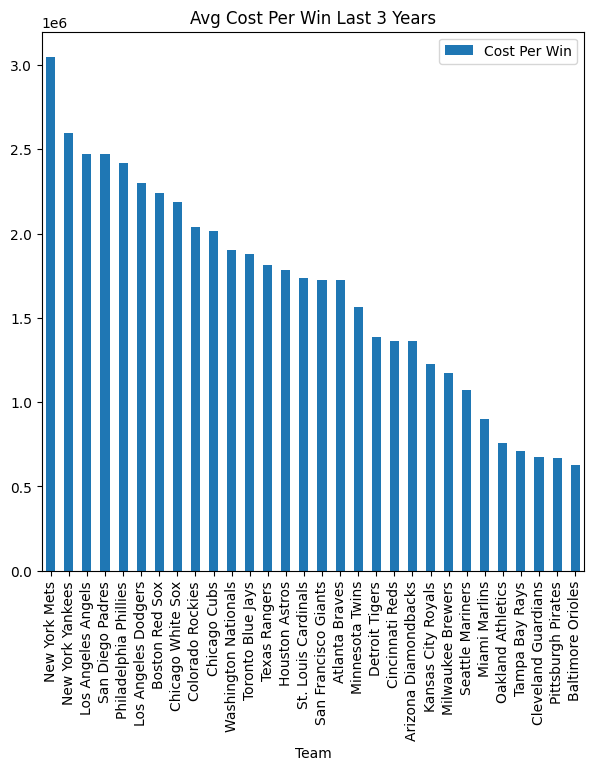

In [225]:
#create variable containing mean Cost Per Win by team. This will include 3 years as it will take the team values over that times and find the mean
avg_cost_per_win = mlb_dataset.groupby(['Team'])['Cost Per Win'].mean()
#turn the variable into a DF for use
avg_cost_per_win = avg_cost_per_win.to_frame()
#sort values for cleaner plot
avg_cost_per_win.sort_values(by='Cost Per Win',ascending=False, inplace=True)

#Plot cost per win over last 3 years
plot_avg_cost = avg_cost_per_win.plot(kind='bar', title='Avg Cost Per Win Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

From these results we can see the NY Mets spend the most money per win over the last 3 years, and the Baltimore Orioles spend the least.
This is interesting information, but does not yet measure any kind of success. Just money spent.

To find one more measure of success, we can find the mean win total for the past 3 years as well.

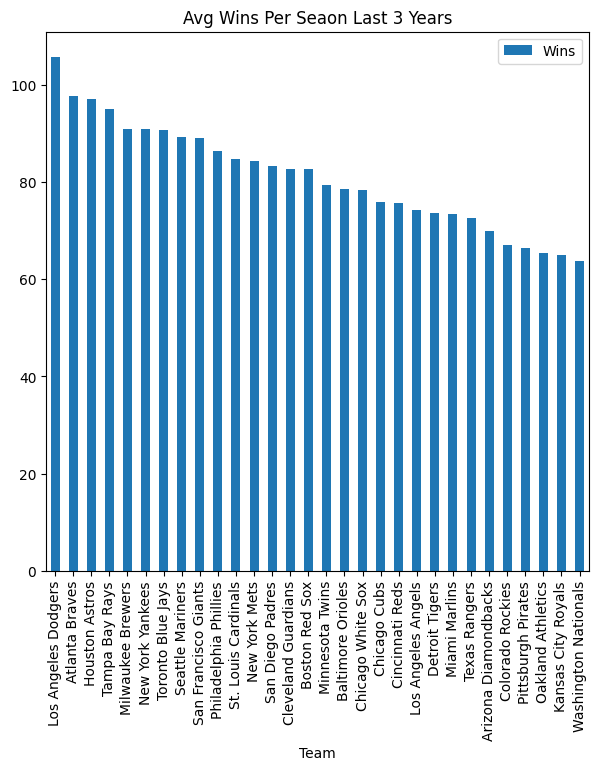

In [226]:
#create variable containing mean wins per year by team. This will include 3 years as it will take the team values over that times and find the mean
avg_wins_3seasons = mlb_dataset.groupby(['Team'])['Wins'].mean()
#turn the variable into a DF for use
avg_wins_3seasons = avg_wins_3seasons.to_frame()
#sort values for cleaner plot
avg_wins_3seasons.sort_values(by='Wins',ascending=False, inplace=True)

#Plot mean wins per year over last 3 years
plot_avg_wins = avg_wins_3seasons.plot(kind='bar', title='Avg Wins Per Seaon Last 3 Years', figsize=(7, 7), legend=True, fontsize=10, align='center')

From an initial glance, these ranking results look quite different from the cost per win results. None of the top 3 or bottom 3 teams match.

To get a better understanding, we can create a scatterplot that will map the Cost Per Win and Wins on an axis.

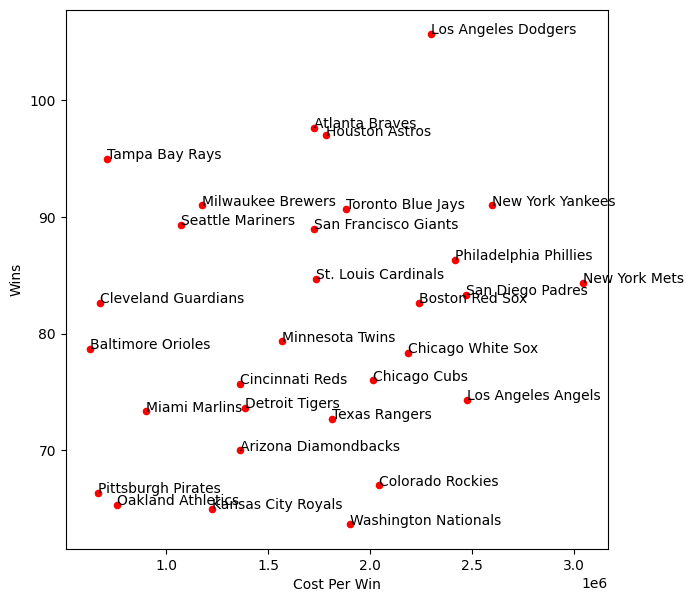

In [227]:
cost_wins = pd.merge(avg_cost_per_win, avg_wins_3seasons, on=['Team'])

fig, ax = plt.subplots(figsize=(7, 7))
cost_wins.plot('Cost Per Win', 'Wins', kind='scatter', ax=ax, c='red')
for k, v in cost_wins.iterrows():
    ax.annotate(k, v)

plt.show()

The above shows that over the past 3 years, the Tampa Bay Rays have the most wins while also spending the least per win. 
Teams such as the Dodgers, Braves and Astros average more wins but pay much more for each one.

Next I will plot the 

<Axes: xlabel='Team'>

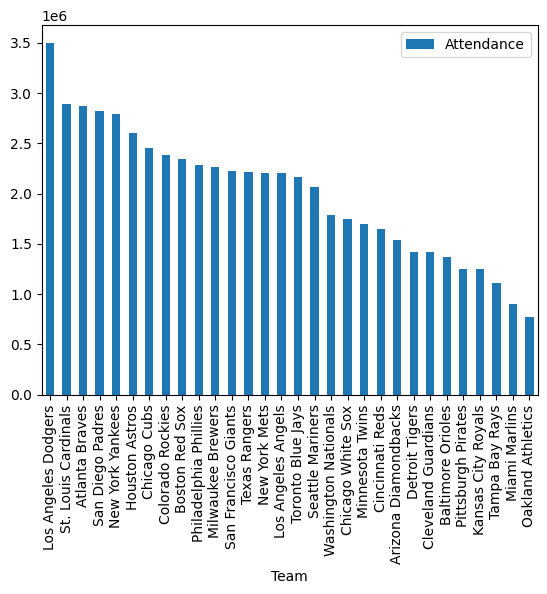

In [228]:
mlb_attendance = mlb_dataset.groupby(['Team'])['Attendance'].mean()
mlb_attendance = mlb_attendance.to_frame()
mlb_attendance.sort_values(by='Attendance', ascending=False, inplace=True)

mlb_attendance.plot.bar()

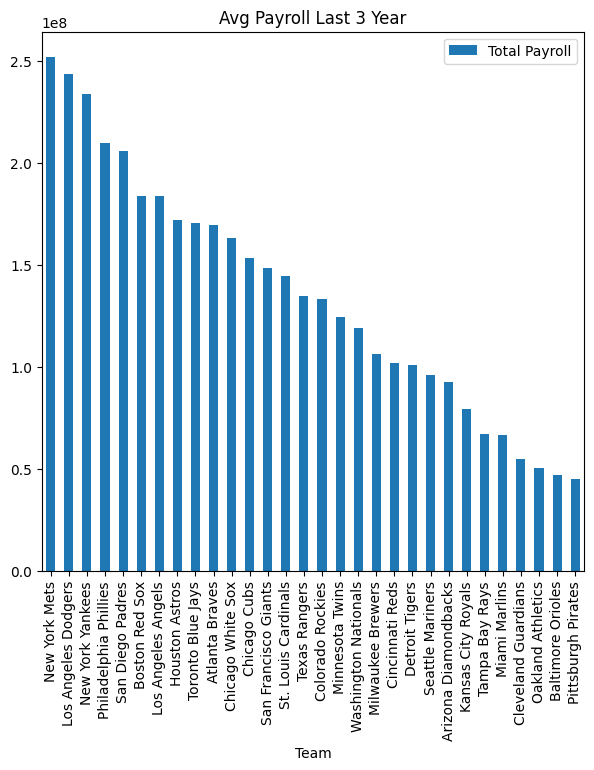

In [229]:
top_payroll = mlb_dataset.groupby(['Team'])['Total Payroll'].mean()
top_payroll = top_payroll.to_frame()
top_payroll.sort_values(by='Total Payroll',ascending=False, inplace=True)

plot_top_payroll = top_payroll.plot(kind='bar', title='Avg Payroll Last 3 Year', figsize=(7, 7), legend=True, fontsize=10, align='center')

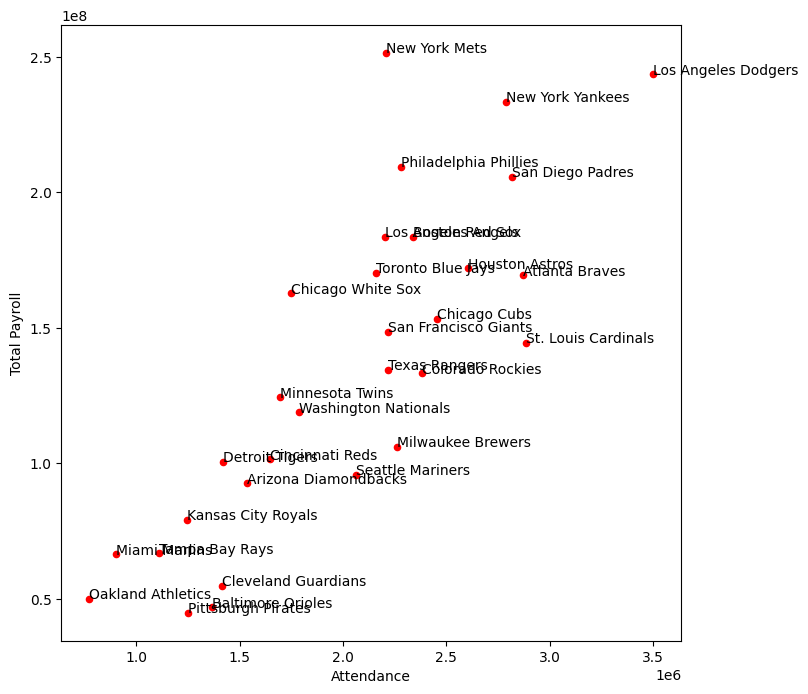

In [230]:
attendance_payroll = pd.merge(mlb_attendance, top_payroll, on=['Team'])

fig, ax = plt.subplots(figsize=(8, 8))
attendance_payroll.plot('Attendance', 'Total Payroll', kind='scatter', ax=ax, c='red')
for k, v in attendance_payroll.iterrows():
    ax.annotate(k, v)

plt.show()

Most effective - 
Top5/10 - Cost Per Win
Top5/10 - Cost Per Fan
Top5/10 - Wins 

In [231]:
top_payroll = top_payroll['Total Payroll'].nlargest(5)
top_mlb_attendance = mlb_attendance['Attendance'].nlargest(5)
top_avg_wins_3seasons = avg_wins_3seasons['Wins'].nlargest(5)

top_payroll = top_payroll.to_frame()
top_mlb_attendnace = top_mlb_attendance.to_frame()
top_avg_wins_3seasons = top_avg_wins_3seasons.to_frame()


top_teams = top_avg_wins_3seasons.merge(top_payroll, on='Team').merge(top_mlb_attendnace, on="Team")

top_teams


,Wins,Total Payroll,Attendance
Team,,,
Los Angeles Dodgers,106,243617948,3501060


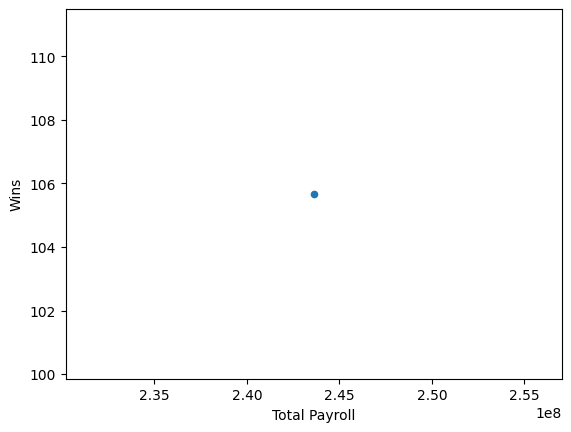

In [232]:
top_teams.plot(kind='scatter', x='Total Payroll', y='Wins')
plt.show()